In [6]:
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "dtKbfKh0pkUgjedMAY31zaSrK"
consumer_secret = "XdyyBI7IzTpMs8wCmd1iAu9VFIyZ4c7Srss8BT5p3XBHsXGufp"
access_token = "1038532858292330496-VIZEG8KX1OyyJMc7etIl5bxbxyxsEW"
access_token_secret = "kBIPwdFwxM81mztXURtYxKt3NvmLWjGm0NUh1OdkvYE3y"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [7]:
news = ['nytimes', 'CNN', 'BBC','CBS', 'fox' ]



In [9]:
tweet_count = 100

sentiment = pd.DataFrame()

for outlet in news:
    news_outlet = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    
    public_tweets = api.user_timeline(outlet, count=tweet_count)
    
    i = 0
    
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_outlet.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_outlet": news_outlet,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    sentiment = sentiment.append(data)  

sentiment.set_index('news_outlet', 'create_date')


,positive,neutral,negative,compound,create_date,tweets_ago
news_outlet,,,,,,
nytimes,0.000,0.734,0.266,-0.7003,2018-09-24 18:18:19+00:00,0
nytimes,0.000,0.761,0.239,-0.2960,2018-09-24 18:15:07+00:00,-1
nytimes,0.165,0.745,0.090,0.4404,2018-09-24 18:00:10+00:00,-2
nytimes,0.177,0.823,0.000,0.5963,2018-09-24 17:50:07+00:00,-3
nytimes,0.117,0.797,0.086,0.1263,2018-09-24 17:40:08+00:00,-4
nytimes,0.000,0.926,0.074,-0.1531,2018-09-24 17:30:04+00:00,-5
nytimes,0.099,0.782,0.119,-0.1280,2018-09-24 17:20:10+00:00,-6
nytimes,0.000,1.000,0.000,0.0000,2018-09-24 17:16:08+00:00,-7
nytimes,0.209,0.791,0.000,0.4404,2018-09-24 17:05:03+00:00,-8


In [10]:
tweets_ago=sentiment.loc[sentiment.news_outlet=='nytimes']['tweets_ago']
tweet_compound=sentiment.loc[sentiment.news_outlet=='nytimes']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


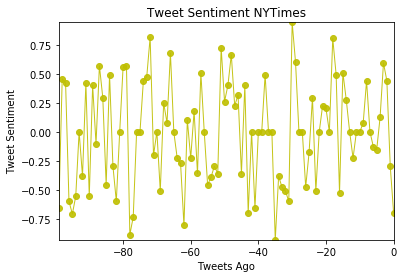

In [11]:
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=1, alpha=0.9, color="y")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 
plt.title("Tweet Sentiment NYTimes")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.show()



In [18]:
tweets_ago=sentiment.loc[sentiment.news_outlet=='CNN']['tweets_ago']
tweet_compound=sentiment.loc[sentiment.news_outlet=='CNN']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


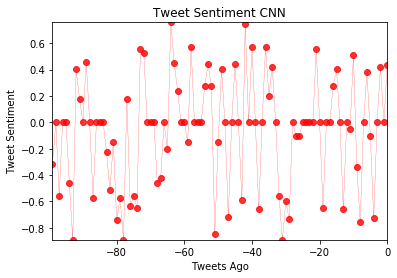

In [17]:
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.75, alpha=0.9, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 
plt.title("Tweet Sentiment CNN")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.show()


In [19]:
tweets_ago=sentiment.loc[sentiment.news_outlet=='BBC']['tweets_ago']
tweet_compound=sentiment.loc[sentiment.news_outlet=='BBC']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


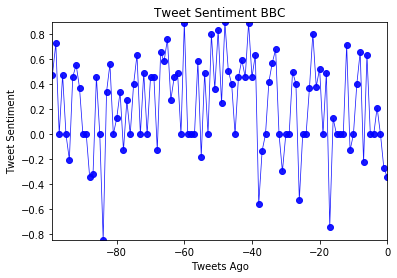

In [20]:
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.75, alpha=0.9, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 
plt.title("Tweet Sentiment BBC")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.show()

In [22]:
tweets_ago=sentiment.loc[sentiment.news_outlet=='fox']['tweets_ago']
tweet_compound=sentiment.loc[sentiment.news_outlet=='fox']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


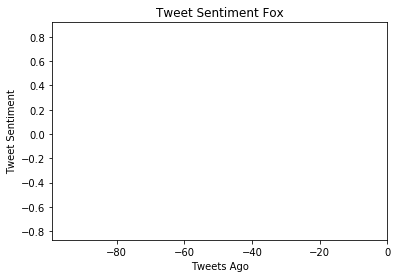

In [23]:
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.75, alpha=0.9, color="w")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 
plt.title("Tweet Sentiment Fox")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.show()

In [24]:
overall = []
for target_outlet in news:
    print(target_outlet)
    tweet_compound=sentiment.loc[sentiment.news_outlet==target_outlet]['compound']
    overall.append(np.mean(tweet_compound))
tweets_ago=sentiment.loc[sentiment.news_outlet=='fox']['tweets_ago']
tweet_compound=sentiment.loc[sentiment.news_outlet=='fox']['compound']
print(tweets_ago.values)

nytimes
CNN
BBC
CBS
fox
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


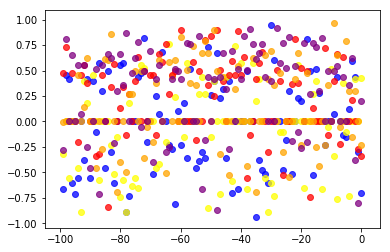

In [27]:
tweets_ago=sentiment.loc[sentiment.news_outlet=='nytimes']['tweets_ago']
nytimes=sentiment.loc[sentiment.news_outlet=='nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="blue",
            alpha=0.75)

tweets_ago=sentiment.loc[sentiment.news_outlet=='CNN']['tweets_ago']
nytimes=sentiment.loc[sentiment.news_outlet=='CNN']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="yellow",
            alpha=0.75)

tweets_ago=sentiment.loc[sentiment.news_outlet=='BBC']['tweets_ago']
nytimes=sentiment.loc[sentiment.news_outlet=='BBC']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="red",
            alpha=0.75)

tweets_ago=sentiment.loc[sentiment.news_outlet=='CBS']['tweets_ago']
nytimes=sentiment.loc[sentiment.news_outlet=='CBS']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="orange",
            alpha=0.75)

tweets_ago=sentiment.loc[sentiment.news_outlet=='fox']['tweets_ago']
nytimes=sentiment.loc[sentiment.news_outlet=='fox']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="purple",
            alpha=0.75)



In [ ]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall[0], facecolor='blue', alpha=0.6, align="center",width=1.0)
plt.bar(1, overall[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick = [value+0.1 for value in x_axis]
plt.xticks(tick, ["NYTimes","CNN","BBC", "CBS", "Fox"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(min(overall_sent)-0.02, max(overall_sent)+0.05)

plt.title("Overall News sentiments ", fontsize=10, color='blue')
plt.xlabel("News Media", fontsize=10, color='blue')
plt.ylabel("Mean overall News Sentiments ", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.show()